In [260]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [261]:
# reading data set
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [262]:
print(x)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [263]:
print(y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [264]:
# reshaping y into 2d array becaue feature scaling expects 2d array
y = y.reshape(len(y), 1)
print(y)


[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [265]:
# applying feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [266]:
print(x)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [267]:
print(y)


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [268]:
# train SVR model on whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)


c:\Users\sharj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [269]:
# pridict new result
predicted_value=regressor.predict(sc_x.transform([[6.5]]))
sc_y.inverse_transform([predicted_value])


array([[170370.0204065]])

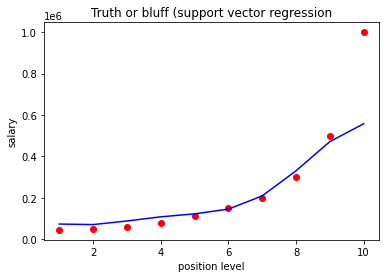

In [270]:
# visualising the SVR results
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
x_plot=sc_x.inverse_transform(x)
y_plot=sc_y.inverse_transform([regressor.predict(x)])
y_plot=y_plot.reshape(x_plot.shape)
plt.plot(x_plot,y_plot , color = 'blue')
plt.title('Truth or bluff (support vector regression')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()